In [1]:
import pandas as pd
import numpy as np
import physt
from physt import h1, h2, h3
import os
import matplotlib.pyplot as plt
import dask
import glob
%matplotlib inline

In [51]:
import pandas as pd

def read_chmi_data(excel_path="B2BTUR01.xls"):
    """Reads all available time series from the CHMI-provided XLS file."""
    sheets = pd.read_excel(excel_path, sheetname=None, skiprows=3)
    del sheets["geografie stanice"]

    df = pd.DataFrame()

    for sheet_name in sheets.keys():
        # sheet_name = "teplota maximální"
        temp_series = sheets[sheet_name].set_index(["rok", "měsíc"]).stack()
        temp_series.index.set_names(["year", "month", "day"], inplace=True)
        temp_series = temp_series.reset_index()
        temp_series.columns = ["year", "month", "day", sheet_name]
        temp_series["day"] = pd.to_numeric(temp_series["day"], errors="coerce")
        temp_series["day"] = temp_series["day"].astype(int)
        # print(temp_series.dtypes)
        temp_series["date"] = pd.to_datetime(temp_series.year*10000+temp_series.month*100+temp_series.day,format='%Y%m%d')
        df[sheet_name] = temp_series.set_index("date")[sheet_name]
    return df

In [52]:
data = read_chmi_data()
data.head()

,teplota maximální,vlhkost vzduchu,úhrn srážek,tlak vzduchu,rychlost větru,sluneční svit,teplota minimální,celková výška sněhu,teplota průměrná
date,,,,,,,,,
1961-01-01,0.5,96.0,2.3,988.4,0.7,0.0,-2.5,5.0,-0.8
1961-01-02,0.5,98.0,0.3,983.9,3.3,0.0,-0.8,7.0,-0.4
1961-01-03,2.8,87.0,0.0,972.6,6.7,0.2,-0.9,6.0,1.5
1961-01-04,7.0,87.0,0.0,971.7,4.3,0.6,0.8,0.0,2.1
1961-01-05,4.0,85.0,0.0,981.5,3.0,1.0,-0.6,0.0,1.1


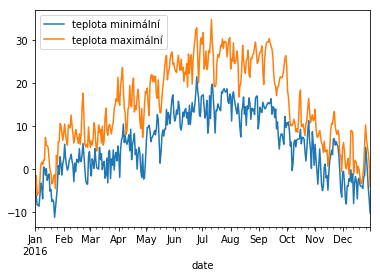

In [58]:
data.loc["2016-01-01":"2016-12-31"][["teplota minimální", "teplota maximální"]].plot()